In [19]:
from pathlib import Path
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor

In [4]:
PATH_TO_DATA_DIR = Path(os.getcwd()).resolve().parent.parent / "Data"
PATH_TO_CLEANED_DICOM_DF = PATH_TO_DATA_DIR / "cleaned_dicom_df.feather"
PATH_TO_SEGMENTATION_DIR = PATH_TO_DATA_DIR / "temp" / "segmentation"
PATH_TO_SEGMENTATION_DF = PATH_TO_DATA_DIR / "segmentation_df.feather"

In [5]:
PATH_TO_SEGMENTATION_DF

WindowsPath('C:/Users/schoe/Desktop/inferring_body_weight_from_ct_scans/Data/segmentation_df.feather')

In [8]:
segmentation = pd.read_feather(PATH_TO_SEGMENTATION_DF)

In [9]:
segmentation

,spleen,kidney_right,kidney_left,gallbladder,liver,stomach,pancreas,adrenal_gland_right,adrenal_gland_left,lung_upper_lobe_left,...,rib_right_6,rib_right_7,rib_right_8,rib_right_9,rib_right_10,rib_right_11,rib_right_12,sternum,costal_cartilages,SliceDirectory
0,33528,46248,44507,9220,333682,55542,19646,862,840,337393,...,9386,9896,7920,6262,5874,5186,2200,23617,54896,C:\Users\schoe\OneDrive - Fachhochschule Salzb...
1,167282,86743,103410,15345,817358,86678,57476,1930,1990,765492,...,14696,14620,11393,10634,8682,6066,1400,43832,104785,C:\Users\schoe\OneDrive - Fachhochschule Salzb...
2,56574,27618,39148,3902,258086,50416,15098,456,1008,193596,...,5254,5298,5362,5178,3814,2208,588,14832,32686,C:\Users\schoe\OneDrive - Fachhochschule Salzb...
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C:\Users\schoe\OneDrive - Fachhochschule Salzb...
4,83200,74936,65155,17167,677116,70465,35868,2400,1940,453004,...,6508,8716,5848,9676,8134,5279,2495,29680,77373,C:\Users\schoe\OneDrive - Fachhochschule Salzb...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,55396,54734,57828,984,444832,217048,27819,1400,1550,556888,...,13376,11240,10440,8480,7235,4279,1890,32972,72968,C:\Users\schoe\OneDrive - Fachhochschule Salzb...
679,43650,35218,61922,8004,572914,96306,30674,1574,1768,414640,...,11132,12338,9692,8220,6468,5268,2772,30782,75568,C:\Users\schoe\OneDrive - Fachhochschule Salzb...
680,83480,53437,64621,5084,439693,95545,35191,800,1685,444120,...,9320,9600,8638,6814,5238,4898,2005,30812,60205,C:\Users\schoe\OneDrive - Fachhochschule Salzb...
681,78579,44734,39550,2018,651892,164890,29268,1359,1224,358860,...,8920,12275,9450,8260,7174,5442,2424,31640,60742,C:\Users\schoe\OneDrive - Fachhochschule Salzb...


In [10]:
cleaned_dicom = pd.read_feather(PATH_TO_CLEANED_DICOM_DF)

In [11]:
cleaned_dicom

,PatientId,PatientAge,PatientSex,PatientWeight,PatientSize,BodyPart,Rows,Columns,SliceCount,PixelSpacing,SliceThickness,SliceDirectory
0,ANONYM-XT8UJZ,64,M,80.0,1.81,Ganzkörper,512,512,487,"[0.9765625, 0.9765625]",4.0,C:\Users\schoe\OneDrive - Fachhochschule Salzb...
1,ANONYM-XT8UJZ_1,56,M,73.0,1.71,Stamm,512,512,567,"[1.171875, 1.171875]",3.0,C:\Users\schoe\OneDrive - Fachhochschule Salzb...
2,ANONYM-XT8UJZ_2,19,F,43.0,1.63,Kopf/Stamm,512,512,323,"[0.9765625, 0.9765625]",3.0,C:\Users\schoe\OneDrive - Fachhochschule Salzb...
3,ANONYM-XT8UJZ_3,77,F,74.0,1.63,Hirn,512,512,119,"[1.171875, 1.171875]",3.0,C:\Users\schoe\OneDrive - Fachhochschule Salzb...
4,ANONYM-XT8UJZ_3,77,F,74.0,1.63,Stamm,512,512,567,"[1.171875, 1.171875]",3.0,C:\Users\schoe\OneDrive - Fachhochschule Salzb...
...,...,...,...,...,...,...,...,...,...,...,...,...
678,ANONYM-BI33HV_438,68,M,50.0,1.65,Stamm,512,512,623,"[1.171875, 1.171875]",3.0,C:\Users\schoe\OneDrive - Fachhochschule Salzb...
679,ANONYM-BI33HV_439,75,M,68.0,1.80,Kopf/Stamm,512,512,323,"[0.9765625, 0.9765625]",3.0,C:\Users\schoe\OneDrive - Fachhochschule Salzb...
680,ANONYM-BI33HV_440,76,F,64.0,1.58,Stamm,512,512,511,"[1.171875, 1.171875]",3.0,C:\Users\schoe\OneDrive - Fachhochschule Salzb...
681,ANONYM-BI33HV_441,80,M,69.0,1.78,Stamm,512,512,293,"[0.9765625, 0.9765625]",3.0,C:\Users\schoe\OneDrive - Fachhochschule Salzb...


In [12]:
merged_df = pd.merge(cleaned_dicom, segmentation, on='SliceDirectory')

In [13]:
merged_df

,PatientId,PatientAge,PatientSex,PatientWeight,PatientSize,BodyPart,Rows,Columns,SliceCount,PixelSpacing,...,rib_right_5,rib_right_6,rib_right_7,rib_right_8,rib_right_9,rib_right_10,rib_right_11,rib_right_12,sternum,costal_cartilages
0,ANONYM-XT8UJZ,64,M,80.0,1.81,Ganzkörper,512,512,487,"[0.9765625, 0.9765625]",...,6187,9386,9896,7920,6262,5874,5186,2200,23617,54896
1,ANONYM-XT8UJZ_1,56,M,73.0,1.71,Stamm,512,512,567,"[1.171875, 1.171875]",...,14960,14696,14620,11393,10634,8682,6066,1400,43832,104785
2,ANONYM-XT8UJZ_2,19,F,43.0,1.63,Kopf/Stamm,512,512,323,"[0.9765625, 0.9765625]",...,4996,5254,5298,5362,5178,3814,2208,588,14832,32686
3,ANONYM-XT8UJZ_3,77,F,74.0,1.63,Hirn,512,512,119,"[1.171875, 1.171875]",...,0,0,0,0,0,0,0,0,0,0
4,ANONYM-XT8UJZ_3,77,F,74.0,1.63,Stamm,512,512,567,"[1.171875, 1.171875]",...,9600,6508,8716,5848,9676,8134,5279,2495,29680,77373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,ANONYM-BI33HV_438,68,M,50.0,1.65,Stamm,512,512,623,"[1.171875, 1.171875]",...,10972,13376,11240,10440,8480,7235,4279,1890,32972,72968
679,ANONYM-BI33HV_439,75,M,68.0,1.80,Kopf/Stamm,512,512,323,"[0.9765625, 0.9765625]",...,10310,11132,12338,9692,8220,6468,5268,2772,30782,75568
680,ANONYM-BI33HV_440,76,F,64.0,1.58,Stamm,512,512,511,"[1.171875, 1.171875]",...,9816,9320,9600,8638,6814,5238,4898,2005,30812,60205
681,ANONYM-BI33HV_441,80,M,69.0,1.78,Stamm,512,512,293,"[0.9765625, 0.9765625]",...,8444,8920,12275,9450,8260,7174,5442,2424,31640,60742


In [16]:
for column in merged_df.columns:
    print(column)

PatientId
PatientAge
PatientSex
PatientWeight
PatientSize
BodyPart
Rows
Columns
SliceCount
PixelSpacing
SliceThickness
SliceDirectory
spleen
kidney_right
kidney_left
gallbladder
liver
stomach
pancreas
adrenal_gland_right
adrenal_gland_left
lung_upper_lobe_left
lung_lower_lobe_left
lung_upper_lobe_right
lung_middle_lobe_right
lung_lower_lobe_right
esophagus
trachea
thyroid_gland
small_bowel
duodenum
colon
urinary_bladder
prostate
kidney_cyst_left
kidney_cyst_right
sacrum
vertebrae_S1
vertebrae_L5
vertebrae_L4
vertebrae_L3
vertebrae_L2
vertebrae_L1
vertebrae_T12
vertebrae_T11
vertebrae_T10
vertebrae_T9
vertebrae_T8
vertebrae_T7
vertebrae_T6
vertebrae_T5
vertebrae_T4
vertebrae_T3
vertebrae_T2
vertebrae_T1
vertebrae_C7
vertebrae_C6
vertebrae_C5
vertebrae_C4
vertebrae_C3
vertebrae_C2
vertebrae_C1
heart
aorta
pulmonary_vein
brachiocephalic_trunk
subclavian_artery_right
subclavian_artery_left
common_carotid_artery_right
common_carotid_artery_left
brachiocephalic_vein_left
brachiocephalic_vein

In [18]:
# drop PatientId Rows Columns PixelSpacing SliceThickness SliceDirectory
cleaned_df = merged_df.drop(['PatientId', 'Rows', 'Columns', 'PixelSpacing', 'SliceThickness', 'SliceDirectory'], axis=1)
cleaned_df

,PatientAge,PatientSex,PatientWeight,PatientSize,BodyPart,SliceCount,spleen,kidney_right,kidney_left,gallbladder,...,rib_right_5,rib_right_6,rib_right_7,rib_right_8,rib_right_9,rib_right_10,rib_right_11,rib_right_12,sternum,costal_cartilages
0,64,M,80.0,1.81,Ganzkörper,487,33528,46248,44507,9220,...,6187,9386,9896,7920,6262,5874,5186,2200,23617,54896
1,56,M,73.0,1.71,Stamm,567,167282,86743,103410,15345,...,14960,14696,14620,11393,10634,8682,6066,1400,43832,104785
2,19,F,43.0,1.63,Kopf/Stamm,323,56574,27618,39148,3902,...,4996,5254,5298,5362,5178,3814,2208,588,14832,32686
3,77,F,74.0,1.63,Hirn,119,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,77,F,74.0,1.63,Stamm,567,83200,74936,65155,17167,...,9600,6508,8716,5848,9676,8134,5279,2495,29680,77373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,68,M,50.0,1.65,Stamm,623,55396,54734,57828,984,...,10972,13376,11240,10440,8480,7235,4279,1890,32972,72968
679,75,M,68.0,1.80,Kopf/Stamm,323,43650,35218,61922,8004,...,10310,11132,12338,9692,8220,6468,5268,2772,30782,75568
680,76,F,64.0,1.58,Stamm,511,83480,53437,64621,5084,...,9816,9320,9600,8638,6814,5238,4898,2005,30812,60205
681,80,M,69.0,1.78,Stamm,293,78579,44734,39550,2018,...,8444,8920,12275,9450,8260,7174,5442,2424,31640,60742


In [28]:
#drop all columns with only empty values
cleaned_df = cleaned_df.dropna(axis=1, how='all')

In [34]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Assume cleaned_df is your DataFrame
X = cleaned_df.drop(columns=['PatientWeight'])  # Features
y = cleaned_df['PatientWeight']                # Target

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(exclude=['object', 'category']).columns

# Preprocessing for categorical data - one-hot encoding
# You can use OrdinalEncoder if the categorical data is ordinal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Perform 5-fold cross-validation
cv_results = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Since cross_val_score returns negative MSE, let's convert it back to positive and take the square root to get RMSE
rmse_scores = (-cv_results) ** 0.5

# Output the cross-validation results
print("Cross-validated RMSE scores for each fold:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Standard Deviation of RMSE:", rmse_scores.std())

# Optionally, fit the model on the entire dataset
model.fit(X, y)


Cross-validated RMSE scores for each fold: [11.22420114 10.78019789 10.26580544  9.36650651 12.6372106 ]
Mean RMSE: 10.85478431497864
Standard Deviation of RMSE: 1.0845222307721931


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['PatientAge', 'PatientSize', 'SliceCount', 'spleen', 'kidney_right',
       'kidney_left', 'gallbladder', 'liver', 'stomach', 'pancreas',
       ...
       'rib_right_5', 'rib_right_6', 'rib_right_7', 'rib_right_8',
       'rib_right_9', 'rib_right_10', 'rib_right_11', 'rib_right_12',
       'sternum', 'costal_cartilages'],
      dtype='object', length=120)),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['PatientSex', 'BodyPart'], dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [36]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error

# Assume cleaned_df is your DataFrame
X = cleaned_df.drop(columns=['PatientWeight'])  # Features
y = cleaned_df['PatientWeight']                # Target

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(exclude=['object', 'category']).columns

# Preprocessing for categorical data - one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define the parameter grid
param_grid = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV with MAE as the scoring metric
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_absolute_error',  # Use MAE for scoring
                           n_jobs=-1)  # Use all available cores

# Fit GridSearchCV
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Convert best score to positive MAE
best_mae = -best_score

print("Best Parameters:", best_params)
print("Best Mean Absolute Error from Grid Search:", best_mae)


Best Parameters: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 150}
Best Mean Absolute Error from Grid Search: 8.007282415199658


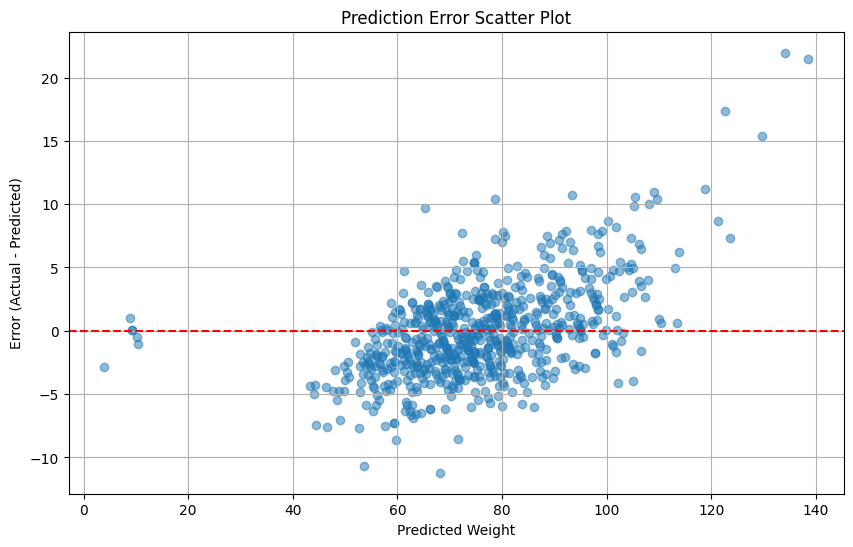

In [37]:
# Retrieve the best model
best_model = grid_search.best_estimator_

# Predict on the entire dataset
y_pred = best_model.predict(X)

# Calculate errors
errors = y - y_pred

# Plot the errors
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, errors, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Weight')
plt.ylabel('Error (Actual - Predicted)')
plt.title('Prediction Error Scatter Plot')
plt.grid(True)
plt.show()

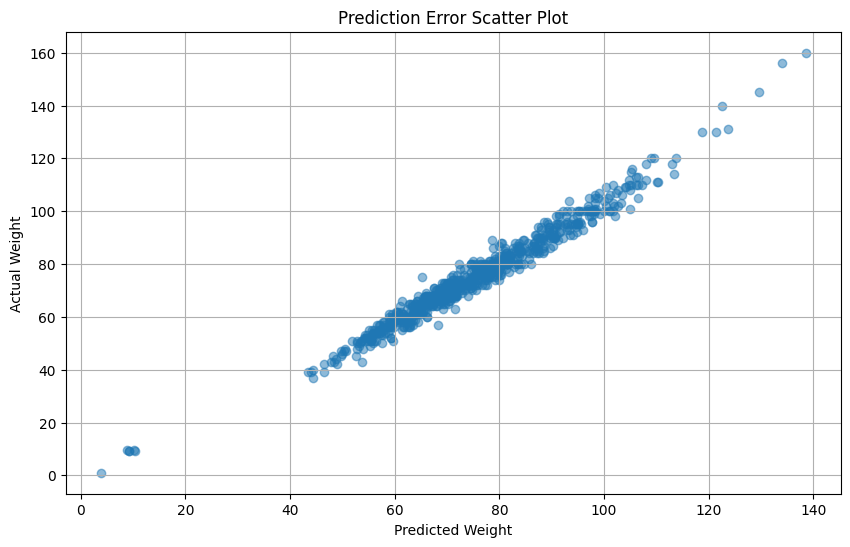

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y, alpha=0.5)
plt.xlabel('Predicted Weight')
plt.ylabel('Actual Weight')
plt.title('Prediction Error Scatter Plot')
plt.grid(True)
plt.show()

In [29]:
X = cleaned_df.drop(columns=['PatientWeight'])  # all columns except the target
y = cleaned_df['PatientWeight']  # the target column

In [31]:
# Set up the RandomForestRegressor
model = RandomForestRegressor(random_state=42)

# Set up K-Fold cross-validation with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [32]:
# Evaluate the model using cross-validation
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert the negative MSE to positive for interpretation
mse_scores = -cv_scores
rmse_scores = mse_scores ** 0.5

print("Cross-Validation RMSE Scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\schoe\anaconda3\envs\RnD\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\schoe\anaconda3\envs\RnD\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\schoe\anaconda3\envs\RnD\Lib\site-packages\sklearn\ensemble\_forest.py", line 363, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\schoe\anaconda3\envs\RnD\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\schoe\anaconda3\envs\RnD\Lib\site-packages\sklearn\utils\validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\schoe\anaconda3\envs\RnD\Lib\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\schoe\anaconda3\envs\RnD\Lib\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\schoe\anaconda3\envs\RnD\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'M'


In [30]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import cross_val_score, KFold

# Assuming cleaned_df is your DataFrame and already loaded

# Identify the categorical columns (assuming they are of dtype 'object')
categorical_features = cleaned_df.select_dtypes(include=['object']).columns.tolist()

# Define features (X) and target (y)
X = cleaned_df.drop(columns=['PatientWeight'])  # all columns except the target
y = cleaned_df['PatientWeight']  # the target column

# Initialize the CatBoostRegressor
model = CatBoostRegressor(cat_features=categorical_features, random_seed=42, verbose=0)

# Set up K-Fold cross-validation with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert the negative MSE to positive for interpretation
mse_scores = -cv_scores
rmse_scores = mse_scores ** 0.5

print("Cross-Validation RMSE Scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\schoe\anaconda3\envs\RnD\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\schoe\anaconda3\envs\RnD\Lib\site-packages\catboost\core.py", line 5827, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline,
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\schoe\anaconda3\envs\RnD\Lib\site-packages\catboost\core.py", line 2385, in _fit
    train_params = self._prepare_train_params(
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\schoe\anaconda3\envs\RnD\Lib\site-packages\catboost\core.py", line 2265, in _prepare_train_params
    train_pool = _build_train_pool(X, y, cat_features, text_features, embedding_features, pairs,
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\schoe\anaconda3\envs\RnD\Lib\site-packages\catboost\core.py", line 1503, in _build_train_pool
    train_pool = Pool(X, y, cat_features=cat_features, text_features=text_features, embedding_features=embedding_features, pairs=pairs, weight=sample_weight, group_id=group_id,
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\schoe\anaconda3\envs\RnD\Lib\site-packages\catboost\core.py", line 848, in __init__
    self._init(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
  File "c:\Users\schoe\anaconda3\envs\RnD\Lib\site-packages\catboost\core.py", line 1481, in _init
    self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
  File "_catboost.pyx", line 4159, in _catboost._PoolBase._init_pool
  File "_catboost.pyx", line 4209, in _catboost._PoolBase._init_pool
  File "_catboost.pyx", line 4025, in _catboost._PoolBase._init_features_order_layout_pool
  File "_catboost.pyx", line 2936, in _catboost._set_features_order_data_pd_data_frame
  File "_catboost.pyx", line 2449, in _catboost.get_cat_factor_bytes_representation
  File "_catboost.pyx", line 1974, in _catboost.get_id_object_bytes_string_representation
TypeError: must be real number, not NoneType
